In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv(r'alldata_Edmundson.csv') 

df.drop(['Depth_1', 'Trap_Fill%', 'Class1', 'Class2', 'Class3'], axis=1, inplace=True)

In [3]:
## Open and closed ends: [1, 2, 3, 4] indicates (1,2], (2,3], (3,4].

## Trap height bins
th_bins = [0,150,300,1000]
th_labels = ['A','B','C']
## Overburden bins
ob_bins = [0,1500,3000,10000]
ob_labels = ['1','2','3']
## Trap fill percent bins
tf_bins = [0,50,75,99,100]
tf_labels = ['A','B','C','D']

## Create columns binning the data into categories
df['TH'] = pd.cut(df['Trap_height'], bins=th_bins, labels=th_labels)
df['OB'] = pd.cut(df['Depth'], bins=ob_bins, labels=ob_labels)
df['TF'] = pd.cut(df['Trap_Fill_2%'], bins=tf_bins, labels=tf_labels)

## Combine the individual categories
df['TH_OB'] = df['TH'].str.cat(df['OB'],sep="")
df['TH_OB_TF'] = df['TH_OB'].str.cat(df['TF'],sep="")

## Copy the category columns
df['th_ob'] = df['TH_OB']
df['th_ob_tf'] = df['TH_OB_TF']
df['th'] = df['TH']

In [4]:
for col in ['TH_OB', 'TH_OB_TF', 'th_ob', 'th_ob_tf']:
    df[col] = df[col].astype('category')

In [5]:
d_th = {}
for i in th_labels:
    d_th[i] = len(df[df.TH == [i]])

In [6]:
th_ob_tf_labels = list(df.TH_OB_TF.unique())
d_th_ob_tf = {}
for i in th_ob_tf_labels:
    d_th_ob_tf[i] = len(df[df.TH_OB_TF == [i]])

In [7]:
th_ob_labels = list(df['TH_OB'].unique())

In [8]:
d_th_ob = {}
for i in th_ob_labels:
    d_th_ob[i] = len(df[df.TH_OB == [i]])

In [9]:
outcomes = len(df.index)

In [10]:
## swapping codes for number of occurrances
df.TH = [d_th[item] for item in df.TH]  
df['pTH'] = df.TH / outcomes

df.TH_OB = [d_th_ob[item] for item in df.TH_OB]
df['pTH_OB'] = df.TH_OB / df.TH

df.TH_OB_TF = [d_th_ob_tf[item] for item in df.TH_OB_TF]
df['pTH_OB_TF'] = df.TH_OB_TF / df.TH_OB

## Calculating result probability
df['pTotal'] = df.pTH * df.pTH_OB * df.pTH_OB_TF


In [11]:
## Creating prob dataframe to drop duplicates
prob = df.drop(['Depth', 'HC_Column', 'Trap_height', 'Trap_Fill_2%'], axis=1)
prob.drop_duplicates(inplace=True)

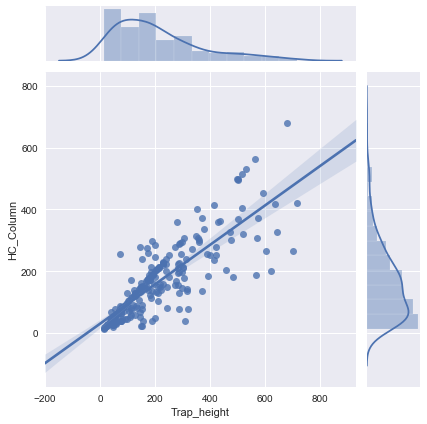

In [12]:
sns.jointplot(y='HC_Column', x='Trap_height', data=df, kind='reg')

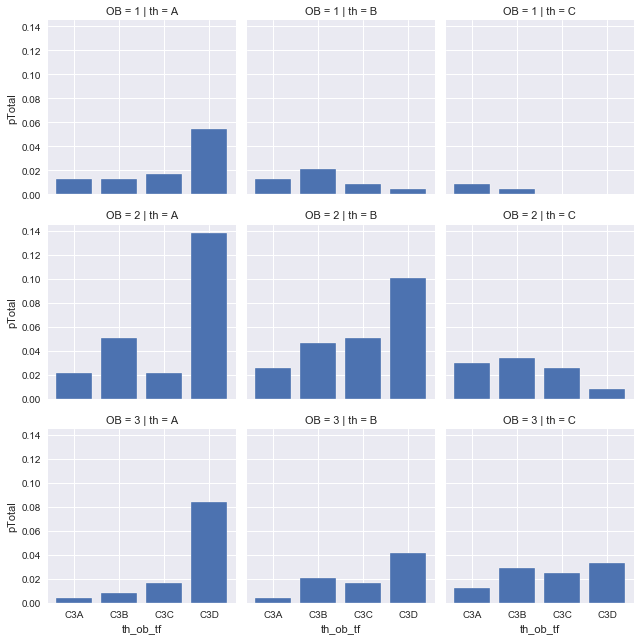

In [13]:
## Plot results : using FacetGrid
g = sns.FacetGrid(data=prob, row='OB' , col='th' )
g.map(plt.bar, 'th_ob_tf', 'pTotal')
plt.savefig('overburden_HCcolumn_by_trapfill_categoryv2',bbox_inches='tight')

In [14]:
prob.head()

,TH,OB,TF,TH_OB,TH_OB_TF,th_ob,th_ob_tf,th,pTH,pTH_OB,pTH_OB_TF,pTotal
0,105,1,A,23,3,A1,A1A,A,0.439331,0.219048,0.130435,0.012552
1,105,2,A,55,5,A2,A2A,A,0.439331,0.523810,0.090909,0.020921
3,105,3,A,27,1,A3,A3A,A,0.439331,0.257143,0.037037,0.004184
4,84,1,A,11,3,B1,B1A,B,0.351464,0.130952,0.272727,0.012552
8,84,2,A,53,6,B2,B2A,B,0.351464,0.630952,0.113208,0.025105


In [15]:
prob.th_ob_tf.unique()

[A1A, A2A, A3A, B1A, B2A, ..., B1D, B2D, B3D, C2D, C3D]
Length: 34
Categories (34, object): [A1A, A2A, A3A, B1A, ..., B2D, B3D, C2D, C3D]

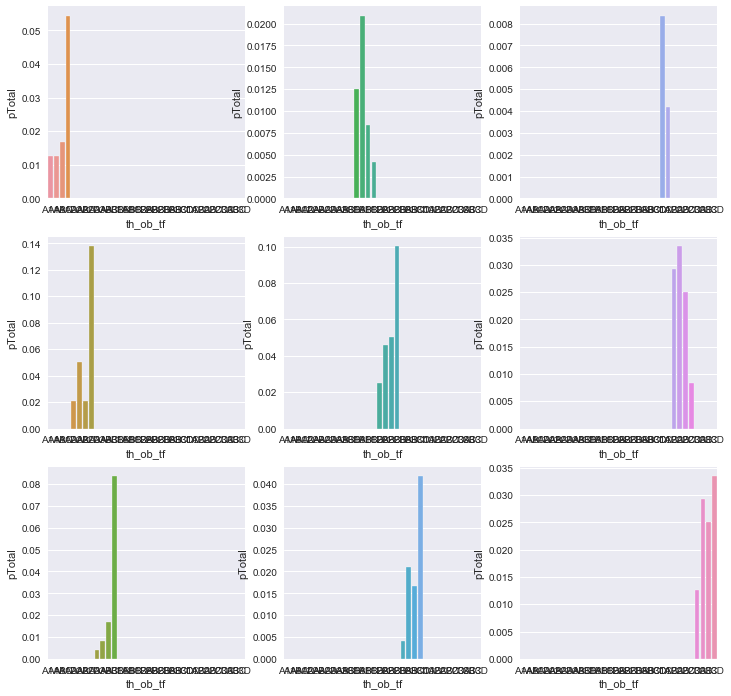

In [16]:
## Plot results using subplots
fig, axes = plt.subplots(3, 3,  figsize=(12,12))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='A1'], ax=axes[0,0])
sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='A2'], ax=axes[1,0])
sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='A3'], ax=axes[2,0])
sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='B1'], ax=axes[0,1])
sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='B2'], ax=axes[1,1])
sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='B3'], ax=axes[2,1])
sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='C1'], ax=axes[0,2])
sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='C2'], ax=axes[1,2])
sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='C3'], ax=axes[2,2])

#axes[2,2].set_title('Trap Height (>300m)')
#axes[2,2].set_xlabel('Trap Fill (m)')
#axes[0,0].set_ylabel('Probability')
#axes[2,2].legend()

plt.savefig('overburden_HCcolumn_by_trapfill_category',bbox_inches='tight')